In [14]:
import re
import nltk
import string
import numpy as np
from nltk import ne_chunk
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from mpl_toolkits.mplot3d import Axes3D
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

%matplotlib widget

In [15]:
#a. Reading the data
with open("P7-Data.txt", "r") as file:
    data = file.read()
    
#b. Printing the first few rows 
print("First few rows of the dataset:")
print(data[:500]) 

First few rows of the dataset:
The contribution of youth to the development of India is undeniable and multifaceted! With a population of over 1.3 billion people, India boasts one of the largest youth populations in the world. This demographic dividend presents immense opportunities for driving economic growth, fostering innovation, and catalyzing social change.

Youth entrepreneurship has emerged as a powerful engine of economic development in India. With access to technology and entrepreneurial resources, young Indians are 


2. Text Preprocessing:

In [16]:
# Tokenization using different methods
# Method 1: NLTK's word_tokenize
tokens_1 = word_tokenize(data)

# Method 2: Split by whitespace
tokens_2 = data.split()

# Method 3: Split by space using regular expression
tokens_3 = re.split(r'\s+', data)

# Method 4: Split by space using string split method
tokens_4 = data.split(' ')

# Compare results
print("Tokenization Results:")
print("Method 1 (NLTK word_tokenize):", tokens_1)
print("Method 2 (Split by whitespace):", tokens_2)
print("Method 3 (Split by space using regex):", tokens_3)
print("Method 4 (Split by space using string split):", tokens_4)

# Length of tokenized lists
print("\nLength of tokenized lists:")
print("Method 1:", len(tokens_1))
print("Method 2:", len(tokens_2))
print("Method 3:", len(tokens_3))
print("Method 4:", len(tokens_4))

# Count repeated words
def count_repeated_words(tokens):
    word_freq = Counter(tokens)
    repeated_words = {word: freq for word, freq in word_freq.items() if freq > 1}
    return repeated_words

# Repeated words for each method
repeated_words_1 = count_repeated_words(tokens_1)
repeated_words_2 = count_repeated_words(tokens_2)
repeated_words_3 = count_repeated_words(tokens_3)
repeated_words_4 = count_repeated_words(tokens_4)

print("\nRepeated words:")
print("Method 1:", repeated_words_1)
print("Method 2:", repeated_words_2)
print("Method 3:", repeated_words_3)
print("Method 4:", repeated_words_4)

# Choose the best tokenization method
# For simplicity, let's use NLTK's word_tokenize method as it handles various cases better
tokens = tokens_1

# Further preprocessing steps (stopword removal, stemming, lemmatization, cleaning)...

#Text Preprocessing
# a.Tokenization using different methods
# Method 1: NLTK's word_tokenize
tokens_1 = word_tokenize(data)

# Method 2: Split by whitespace
tokens_2 = data.split()

# Method 3: Split by space using regular expression
tokens_3 = re.split(r'\s+', data)

# Method 4: Split by space using string split method
tokens_4 = data.split(' ')

# Compare results and use the one that gives better tokenization

# For simplicity, let's use NLTK's word_tokenize method as it handles various cases better

tokens = tokens_4

# b.Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# c.Initialize stemming and lemmatization objects
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Perform stemming
stemmed_tokens = [porter.stem(word) for word in filtered_tokens]

# Perform lemmatization
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

# d.Clean the text by removing special characters, punctuation, and numbers
cleaned_tokens = [re.sub(r'[^A-Za-z]', '', word) for word in lemmatized_tokens if word]

# Filter out empty strings
cleaned_tokens = [word for word in cleaned_tokens if word]

# Display preprocessed tokens
print("Preprocessed Tokens:")
print(cleaned_tokens)


Tokenization Results:
Method 1 (NLTK word_tokenize): ['The', 'contribution', 'of', 'youth', 'to', 'the', 'development', 'of', 'India', 'is', 'undeniable', 'and', 'multifaceted', '!', 'With', 'a', 'population', 'of', 'over', '1.3', 'billion', 'people', ',', 'India', 'boasts', 'one', 'of', 'the', 'largest', 'youth', 'populations', 'in', 'the', 'world', '.', 'This', 'demographic', 'dividend', 'presents', 'immense', 'opportunities', 'for', 'driving', 'economic', 'growth', ',', 'fostering', 'innovation', ',', 'and', 'catalyzing', 'social', 'change', '.', 'Youth', 'entrepreneurship', 'has', 'emerged', 'as', 'a', 'powerful', 'engine', 'of', 'economic', 'development', 'in', 'India', '.', 'With', 'access', 'to', 'technology', 'and', 'entrepreneurial', 'resources', ',', 'young', 'Indians', 'are', 'launching', 'startups', 'and', 'ventures', 'across', 'various', 'sectors', ',', 'from', 'technology', 'and', 'e-commerce', 'to', 'agriculture', 'and', 'healthcare', '.', 'These', 'startups', 'are', 'no

3. Text Visualization:

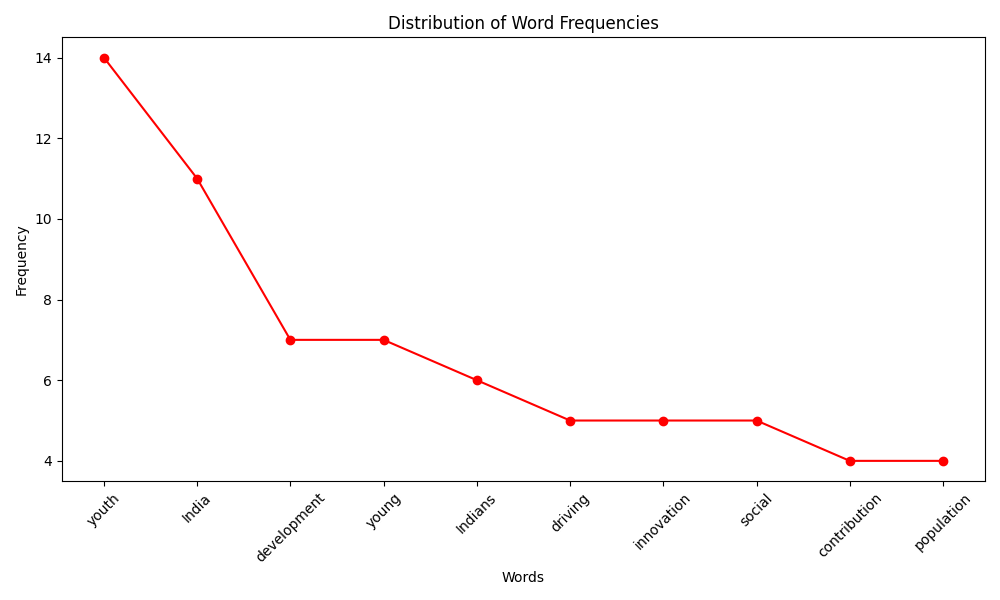

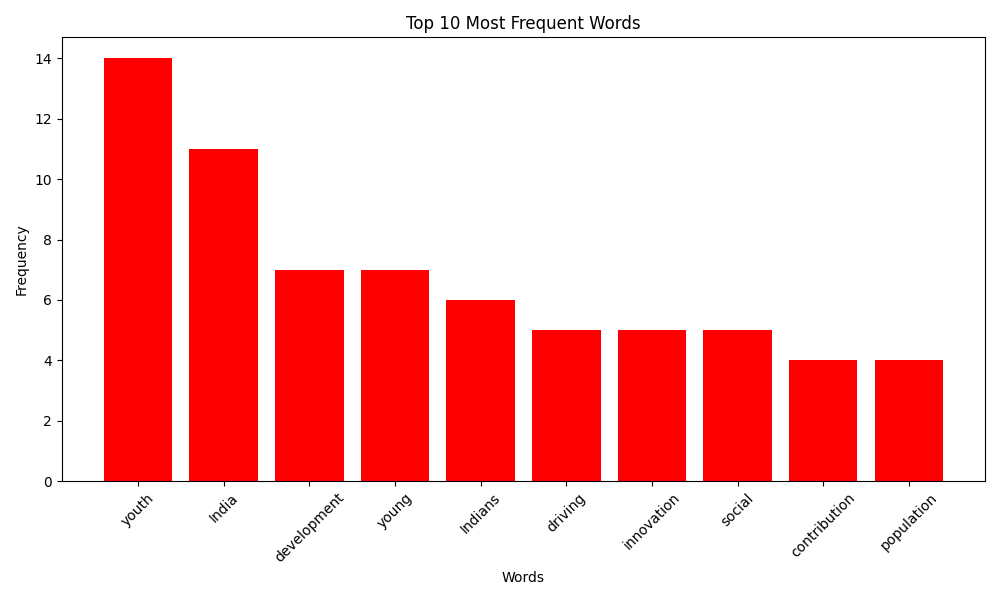

In [17]:
#Text Visualization:
import matplotlib.pyplot as plt
from collections import Counter

# Calculate word frequencies
word_freq = Counter(cleaned_tokens)

# Extract the most frequent 10 words
most_common_words = word_freq.most_common(10)
words, frequencies = zip(*most_common_words)

# a.Plot the distribution of word frequencies (Line Chart)
plt.figure(figsize=(10, 6))
plt.plot(range(len(words)), frequencies, marker='o', linestyle='-',color='red')
plt.xticks(range(len(words)), words, rotation=45)
plt.title('Distribution of Word Frequencies')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# b.Visualize the most frequent 10 words (Bar Chart)
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='red')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4. Text Analysis:

In [18]:
#Text Analysis:
import spacy
from spacy import displacy

# Load the English NER model
nlp = spacy.load("en_core_web_sm")
doc = nlp(data)
displacy.serve(doc, style="ent")

# Join the preprocessed tokens back into a single string
text = ' '.join(cleaned_tokens)

# Apply Named Entity Recognition (NER)
doc = nlp(text)

# Extract named entities
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Print named entities
print("Named Entities:")
for entity in entities:
    print(entity)

C:\Users\Symen-A\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\spacy\displacy\__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

